In [2]:

import numpy as np
import matplotlib.pyplot as plt

import funciones as fn
from funciones import *



C:\Users\Francisco\AppData\Local\Temp\ipykernel_22772\4121453419.py:6: RuntimeWarning: divide by zero encountered in divide
  wavelengths = 2 * np.pi / omega * 1000


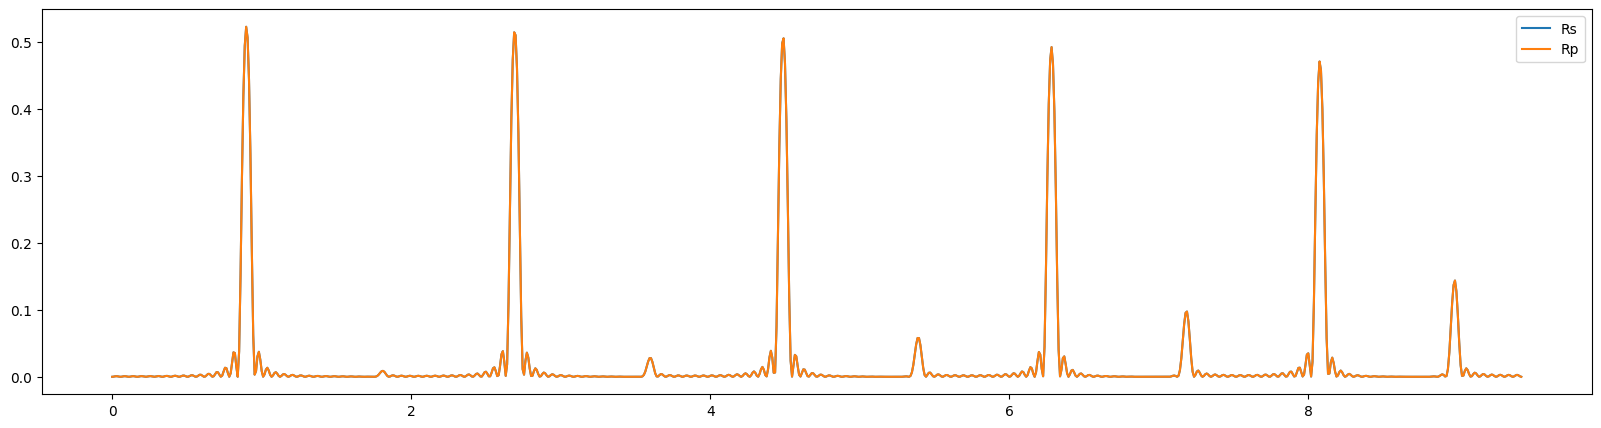

In [8]:
n = [3.4] + [3.6] + [3.4, 3.6] * 15 + [3.4]
d = [0] + [500] + [500, 500] * 15 + [0]

omega = np.linspace(0, 3 * np.pi, 1000)

wavelengths = 2 * np.pi / omega * 1000

Rss = []
Rpp = []
Tss = []
Tpp = []
for wavel in wavelengths:
    Rs, Rp, Ts, Tp = multicapa(n, d, wavel, theta0=np.pi / 180 * 0)
    Rss.append(Rs)
    Rpp.append(Rp)
    Tss.append(Ts)
    Tpp.append(Tp)

plt.figure(figsize=(20, 5))
plt.plot(omega, Rss, label='Rs')
plt.plot(omega, Rpp, label='Rp')

plt.legend()
plt.show()

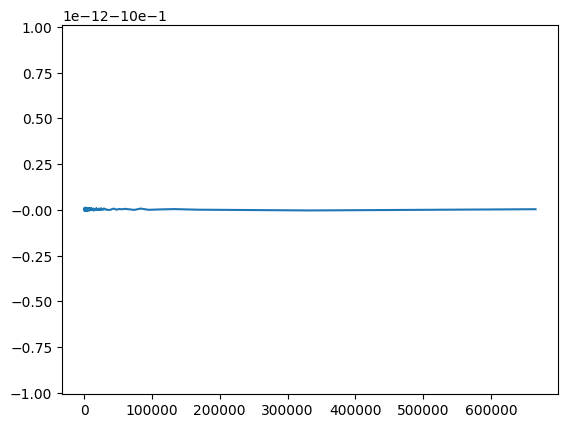

In [9]:
noice = np.ones(len(Rss)) - Rss - Rpp - Tss - Tpp

plt.plot(wavelengths, noice)
plt.show()

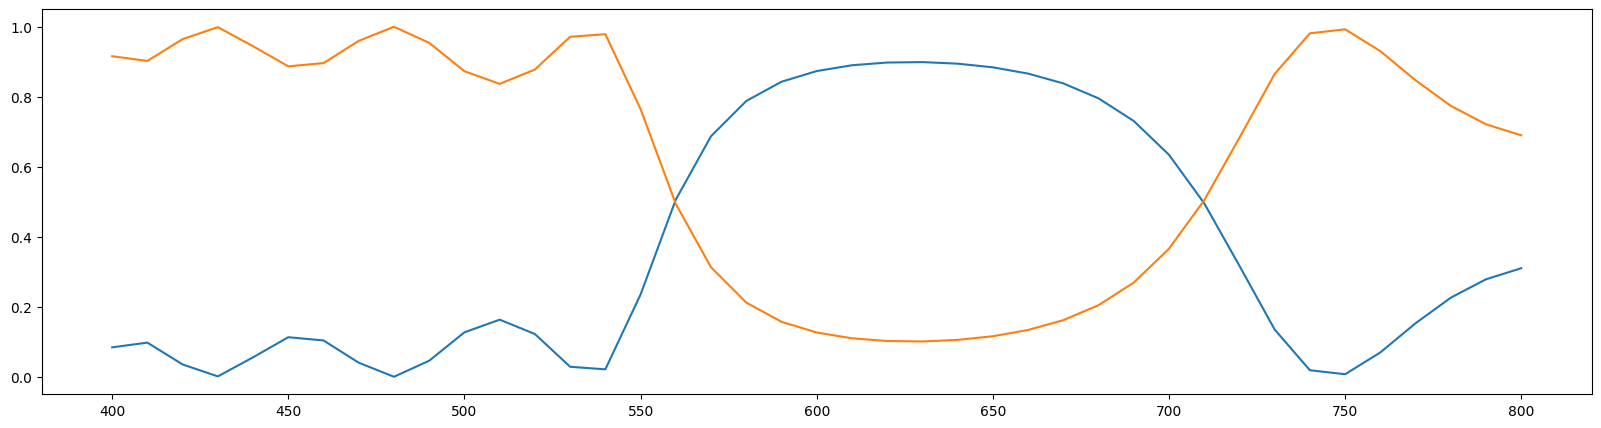

In [10]:
theta = 15  # degrees
capas = 5

dcapal = 90
dcapah = 110

n = [1] + [1.75, 1.35] * capas + [1.75] + [1]
d = [0] + [dcapah, dcapal] * capas + [dcapah] + [0]

wavelengths = np.linspace(400, 800, 41)
Rss = []
Rpp = []
Tss = []
Tpp = []

for wavel in wavelengths:
    Rs, Rp, Ts, Tp = multicapa(n, d, wavel, theta0=np.pi / 180 * theta)

    Rss.append(Rs)
    Rpp.append(Rp)
    Tss.append(Ts)
    Tpp.append(Tp)

plt.figure(figsize=(20, 5))
plt.plot(wavelengths, Rss, label='Rs')
plt.plot(wavelengths, Tss, label='Ts')
plt.show()

In [11]:
import pandas as pd

df = pd.DataFrame({'wavelength': wavelengths, 'Rs': Rss,
                  'Rp': Rpp, 'Ts': Tss, 'Tp': Tpp})

df.to_csv('data.csv', index=False)

In [12]:
data = pd.read_csv('data.csv')

data.head()

,wavelength,Rs,Rp,Ts,Tp
0,400.0,0.084141,0.069078,0.915859,0.930922
1,410.0,0.097622,0.080352,0.902378,0.919648
2,420.0,0.035191,0.028551,0.964809,0.971449
3,430.0,0.001111,0.000935,0.998889,0.999065
4,440.0,0.055688,0.045933,0.944312,0.954067


<Axes: xlabel='wavelength'>

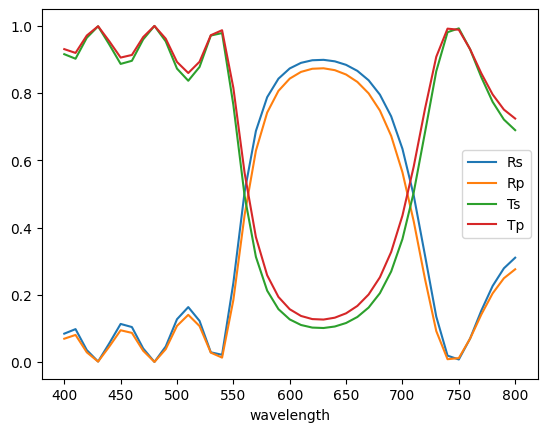

In [45]:
data.plot(x='wavelength', y=['Rs', 'Rp', 'Ts', 'Tp'])

In [9]:

def fom(file, n, d, theta):
    data = pd.read_csv(file)
    R = data['Rs']
    Rpred = []
    
    for wavel in data['wavelength']:
        Rcal, _, _, _ = multicapa([1]+n+[1], [0]+d+[0], wavel, theta0=np.pi / 180 * theta)
        Rpred.append(Rcal)

    return np.sum((R-Rpred)**2) / len(R)


energia = fom("data.csv", n, d, 15)

print(energia)

NameError: name 'n' is not defined

> Vamos a usar la librería pygad para usar algoritmos genéticos [link](https://pygad.readthedocs.io/en/latest/pygad.html#examples)
>
> instalar la librería usando ```pip install pygad```

In [3]:
import pygad

In [8]:
function_inputs = [[1], [1]] * 10
print(function_inputs)
desired_output = 0


def fitness(ga_instance, solution, solution_idx):
    n = solution[:10]
    d = solution[10:]
    return -1*fom("data.csv", n, d, 15)


fitness_function = fitness

num_generations = 5
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)
print(num_genes)
init_range_low = [1,1] * 10
init_range_high = [2]*10 + [200]*10


parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10


ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
20


In [17]:
# hacer esto en cuda

ga_instance.run();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


solucion [  1.10229821   2.13963122   1.86426285   1.23806747   1.98074741
   1.97033025   1.38278843   2.4536806    0.4011542    1.88210783
  95.17335414  16.32819592  88.8997765  109.68562469  37.31998848
 144.57307614 136.49472897  51.81432235  67.94253705 119.21101938], fitness -0.07346159525790379 indice 0


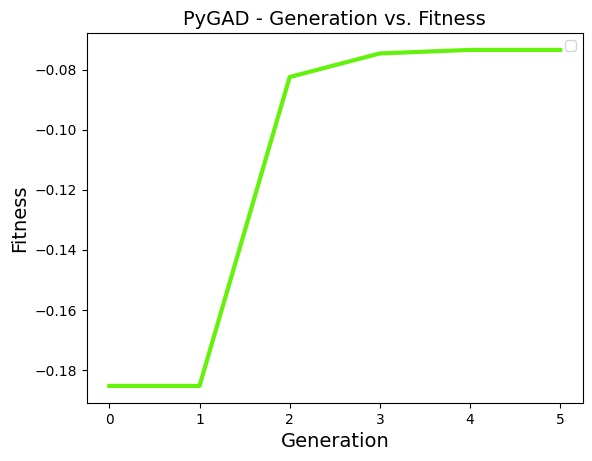

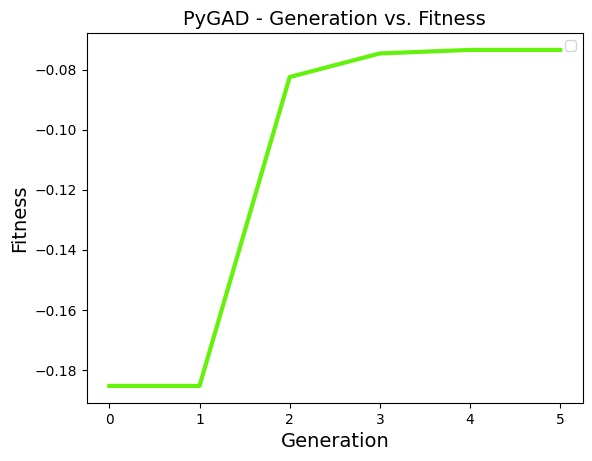

In [18]:
a, b, c = ga_instance.best_solution();
print(f"solucion {a}, fitness {b} indice {c}")

ga_instance.plot_fitness()

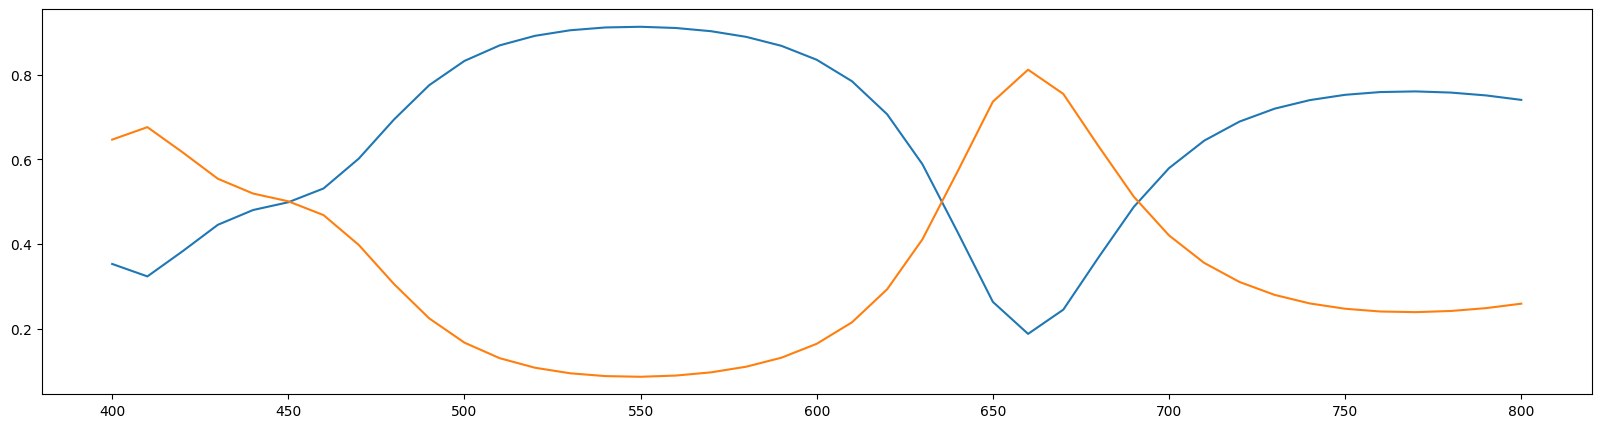

In [58]:
# representamos la mejor solucion
n = a[:10]
d = a[10:]
Rss = []
Rpp = []
Tss = []
Tpp = []

for wavel in wavelengths:
    Rs, Rp, Ts, Tp = multicapa(n, d, wavel, theta0=np.pi / 180 * 15)

    Rss.append(Rs)
    Rpp.append(Rp)
    Tss.append(Ts)
    Tpp.append(Tp)

plt.figure(figsize=(20, 5))
plt.plot(wavelengths, Rss, label='Rs')
plt.plot(wavelengths, Tss, label='Ts')
plt.show()

In [16]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

# Definición de la función de fitness
def fitness_func(ga_instance, solution, solution_idx):
    n = solution[:num_genes // 2]
    d = solution[num_genes // 2:]
    return -1*fom("data.csv", n, d, 15)


# Parámetros del algoritmo genético
num_genes = 2 * 6
gene_space = [{'low': 1.0, 'high': 2.0} if i < num_genes // 2 else {'low': 0, 'high': 200.0} for i in range(num_genes)]  # Ajuste para asegurar que los genes sean positivos
sol_per_pop = 50
num_parents_mating = 5
num_generations = 100
mutation_percent_genes = 1
parent_selection_type = "sss"
keep_parents = 2
crossover_type = "uniform"
mutation_type = "random"


def on_generation(ga_instance):
    # early stopping
    if ga_instance.best_solution()[1] < 0.01:
        ga_instance.keep_solving = False

# Inicialización del algoritmo genético
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    on_generation=on_generation
)

# Ejecución del algoritmo genético
ga_instance.run()

# Obtención de la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Mejor solución: {solution}")
print(f"Fitness de la mejor solución: {solution_fitness}")

# Visualización de la evolución del fitness
ga_instance.plot_fitness()
plt.show()


name 'pd' is not defined
Traceback (most recent call last):
  File "c:\Users\Francisco\miniconda3\Lib\site-packages\pygad\pygad.py", line 1708, in cal_pop_fitness
    fitness = self.fitness_func(self, sol, sol_idx)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Francisco\AppData\Local\Temp\ipykernel_10772\4269827555.py", line 9, in fitness_func
    return -1*fom("data.csv", n, d, 15)
              ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Francisco\AppData\Local\Temp\ipykernel_10772\1710966295.py", line 2, in fom
    data = pd.read_csv(file)
           ^^
NameError: name 'pd' is not defined
name 'pd' is not defined
Traceback (most recent call last):
  File "c:\Users\Francisco\miniconda3\Lib\site-packages\pygad\pygad.py", line 1914, in run
    self.last_generation_fitness = self.cal_pop_fitness()
                                   ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Francisco\miniconda3\Lib\site-packages\pygad\pygad.py", line 1871, in cal_pop_fitness
    raise

NameError: name 'pd' is not defined

In [10]:
print("n: ", solution[:num_genes // 2])
print("d: ", solution[num_genes // 2:])

print(solution)

NameError: name 'solution' is not defined

In [11]:
# Ahora vamos a representar la solución obtenida
n = [1] + solution[:num_genes // 2] + [1]
d = [0] + solution[num_genes // 2:] + [0]

wavelengths = np.linspace(400, 800, 41)
Rss = []
Rpp = []
Tss = []
Tpp = []

for wavel in wavelengths:
    Rs, Rp, Ts, Tp = multicapa(n, d, wavel, theta0=np.pi / 180 * 15)

    Rss.append(Rs)
    Rpp.append(Rp)
    Tss.append(Ts)
    Tpp.append(Tp)

plt.figure(figsize=(20, 5))
plt.plot(wavelengths, Rss, label='Rs')
plt.plot(wavelengths, Tss, label='Ts')
plt.plot(data['wavelength'], data['Rs'], label='Rs data')
plt.legend()
plt.show()

NameError: name 'solution' is not defined

In [25]:
# Ahora vamos a probar a optimizar utilizando en la función de fitness, el modelo subrogado que guardamos como modelo_multicapa_1.keras
import tensorflow.keras as keras
model = keras.models.load_model('modelo_multicapa_1.keras')

def fitness_func(ga_instance, solution, solution_idx):
    n = solution[:6]
    d = solution[6:12]
    ll = np.linspace(400, 800, 50)
    Rs = []
    for wavel in ll:
        X = np.array([n + d + [wavel]])
        Rs.append(model.predict(X))[0][0]


# Inicialización del algoritmo genético

ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes= 12,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    on_generation=on_generation
)

# Ejecución del algoritmo genético
ga_instance.run()

# Obtención de la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution()

print(f"Mejor solución: {solution}")

print(f"Fitness de la mejor solución: {solution_fitness}")

c:\Users\Francisco\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\Users\Francisco\miniconda3\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=1) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\Francisco\miniconda3\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' paramet

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_24" is incompatible with the layer: expected axis -1 of input shape to have value 13, but received input with shape (1, 6)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 6), dtype=float32)
  • training=False
  • mask=None